In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

%matplotlib inline
from matplotlib.pylab import rcParams
import matplotlib as mpl

rcParams['figure.figsize'] = 15, 5

import datetime

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
df = pd.read_csv('india_temperatures.csv')

new_df = pd.DataFrame(columns=['month', 'temp'])

for i in range(df.shape[0]):
    for j in range(1, 13):
        new_df.loc[i*12 + j] = [str(int(df.loc[i]['YEAR'])) + '-' + "{0:0=2d}".format(j), df.iloc[i,j]]
        
new_df['month'] = pd.to_datetime(new_df['month'])
new_df.set_index('month', inplace=True)


ts = new_df['temp']

In [4]:
pd.read_csv('india_temperatures.csv').head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57


In [5]:
pd.read_csv('india_temperatures.csv').tail()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
112,2013,24.56,26.59,30.62,32.66,34.46,32.44,31.07,30.76,31.04,30.27,27.83,25.37,29.81,25.58,32.58,31.33,27.83
113,2014,23.83,25.97,28.95,32.74,33.77,34.15,31.85,31.32,30.68,30.29,28.05,25.08,29.72,24.90,31.82,32.00,27.81
114,2015,24.58,26.89,29.07,31.87,34.09,32.48,31.88,31.52,31.55,31.04,28.10,25.67,29.90,25.74,31.68,31.87,28.27
115,2016,26.94,29.72,32.62,35.38,35.72,34.03,31.64,31.79,31.66,31.98,30.11,28.01,31.63,28.33,34.57,32.28,30.03
116,2017,26.45,29.46,31.60,34.95,35.84,33.82,31.88,31.72,32.22,32.29,29.60,27.18,31.42,27.95,34.13,32.41,29.69


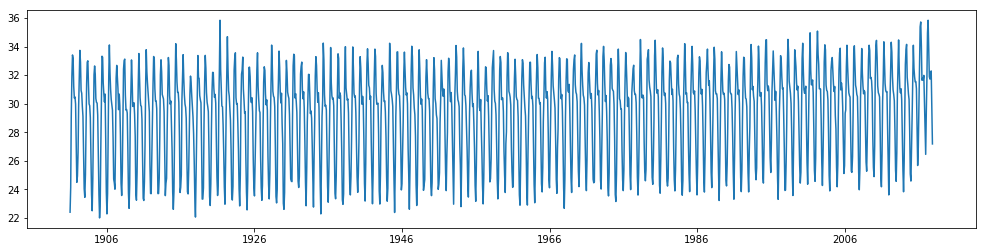

In [37]:
plt.figure(figsize=(17,4))
plt.plot(ts)

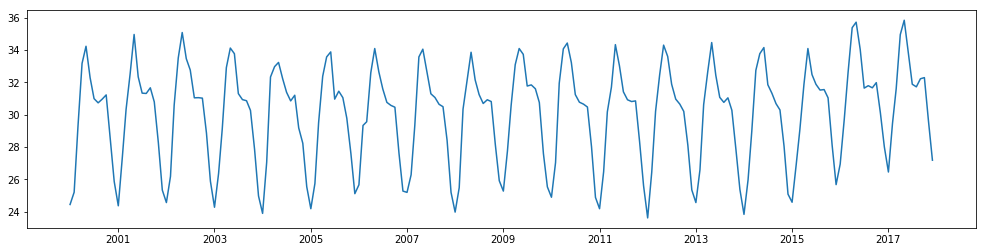

In [38]:
plt.figure(figsize=(17,4))
plt.plot(ts.loc['2000-01-01':])

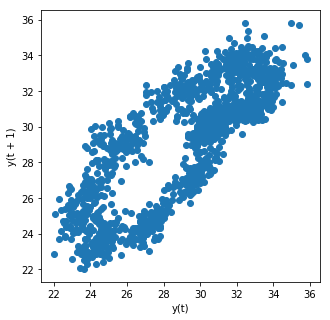

In [39]:
plt.figure(figsize=(5,5))
pd.plotting.lag_plot(ts)

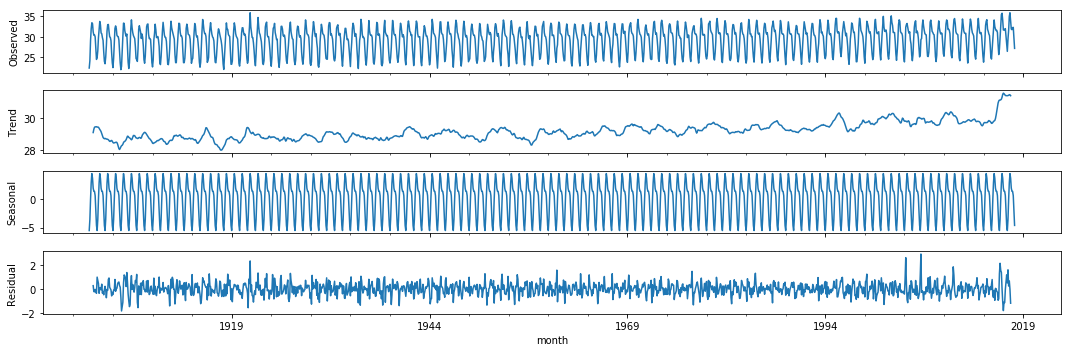

In [40]:
decomposition = sm.tsa.seasonal_decompose(ts, model='additive')
decomposition.plot()
plt.show()

In [41]:
ts_lg = pd.concat([ts, ts.shift(1), ts.shift(2)], axis=1)
ts_lg.columns = ['t', 't-1', 't-2']
result = ts_lg.corr()
print('Correlation between t & t =', result['t']['t'])
print('Correlation between t & t-1 =', result['t']['t-1'])
print('Correlation between t & t-2 =', result['t']['t-2'])

Correlation between t & t = 1.0
Correlation between t & t-1 = 0.7908195091927569
Correlation between t & t-2 = 0.3396171309342606


In [42]:
split = ts.index.min() + (ts.index.max() - ts.index.min())/2

ts_1, ts_2 = ts[ts.index.min():split], ts[split:]
mean1, mean2 = ts_1.mean(), ts_2.mean()
var1, var2 = ts_1.var(), ts_2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=28.836182, mean2=29.560043
variance1=10.536953, variance2=9.546556


In [57]:
# p-value > 0.05 = non-stationary
# p-value <= 0.05 = stationary

# test-statistics < critical-value = stationary

result = adfuller(ts, regression='ct')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.124769
p-value: 0.005799
Critical Values:
	1%: -3.965
	5%: -3.414
	10%: -3.129


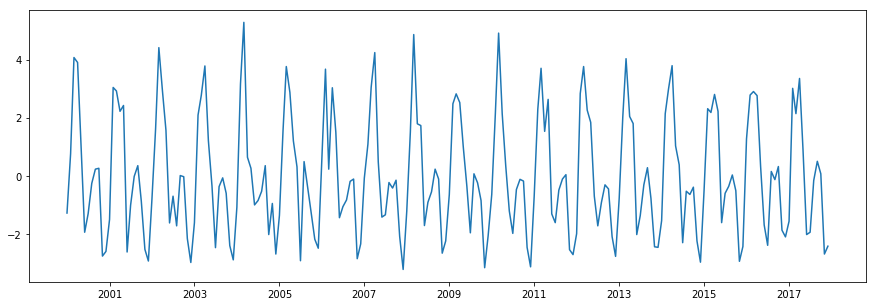

In [44]:
dif_ts = ts.diff()
dif_ts.dropna(inplace=True)

plt.figure(figsize=(15,5))
plt.plot(dif_ts.loc['2000-01-01':])

In [55]:
result = adfuller(dif_ts, regression='ct')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -11.618885
p-value: 0.000000
Critical Values:
	1%: -3.965
	5%: -3.414
	10%: -3.129


In [46]:
ts_l = ts.loc['2010-01-01':]
dif_l = dif_ts.loc['2010-01-01':]

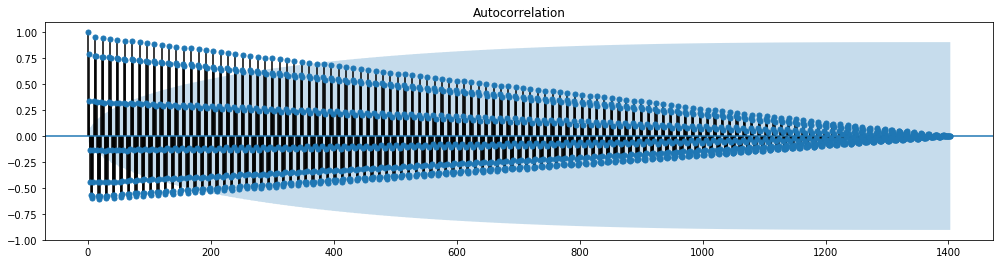

In [51]:
with mpl.rc_context():
    mpl.rc("figure", figsize=(17,4))
    plot_acf(ts)

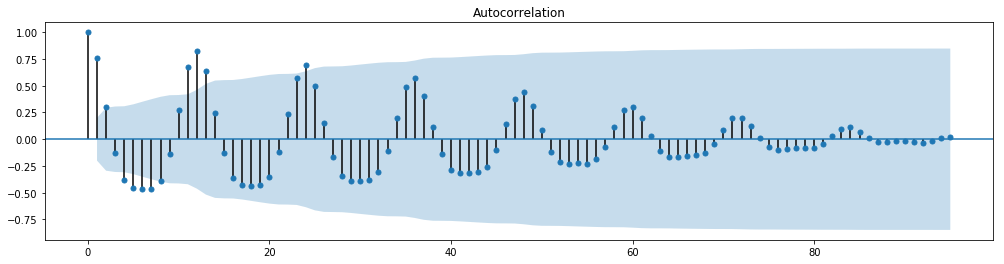

In [52]:
with mpl.rc_context():
    mpl.rc("figure", figsize=(17,4))
    plot_acf(ts_l)

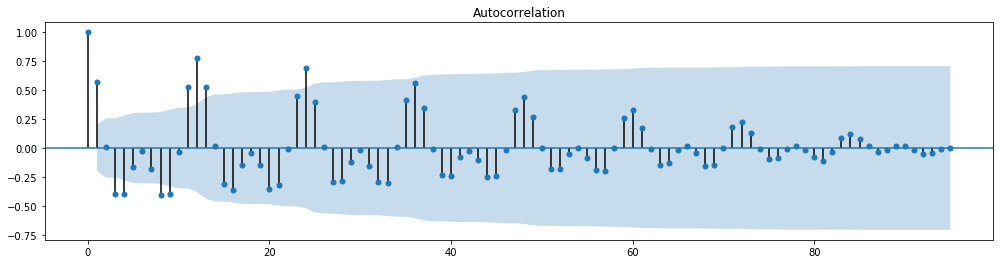

In [53]:
with mpl.rc_context():
    mpl.rc("figure", figsize=(17,4))
    plot_acf(dif_l)

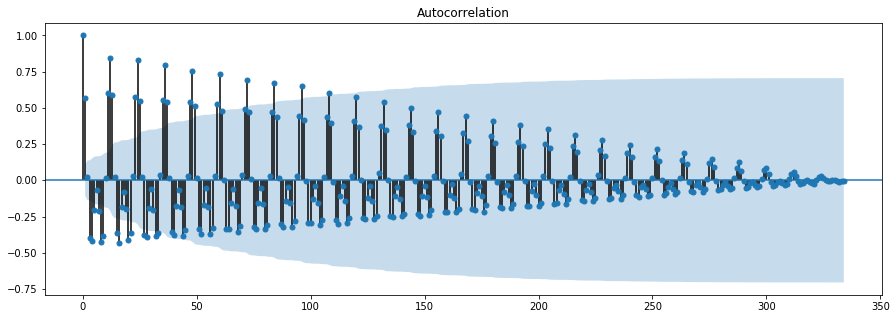

In [144]:
with mpl.rc_context():
    mpl.rc("figure", figsize=(15,5))
    plot_acf(ts.diff().dropna())

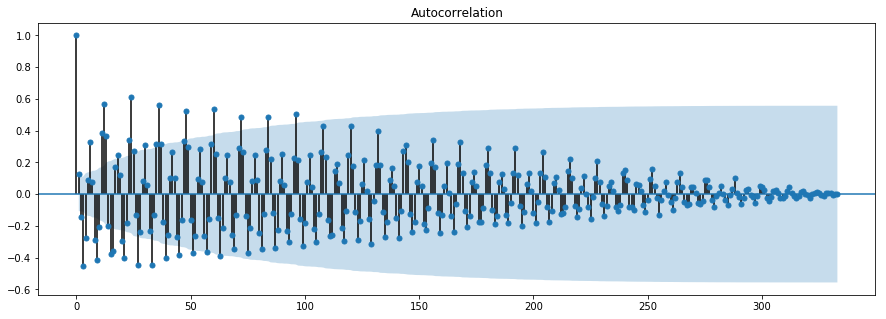

In [145]:
with mpl.rc_context():
    mpl.rc("figure", figsize=(15,5))
    plot_acf(ts.diff().diff().dropna())

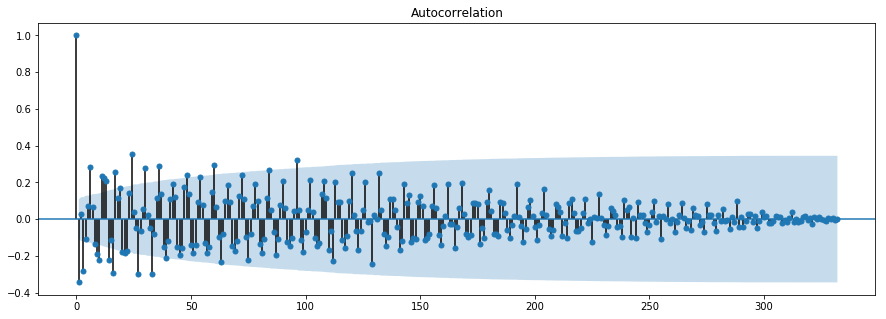

In [146]:
with mpl.rc_context():
    mpl.rc("figure", figsize=(15,5))
    plot_acf(ts.diff().diff().diff().dropna())

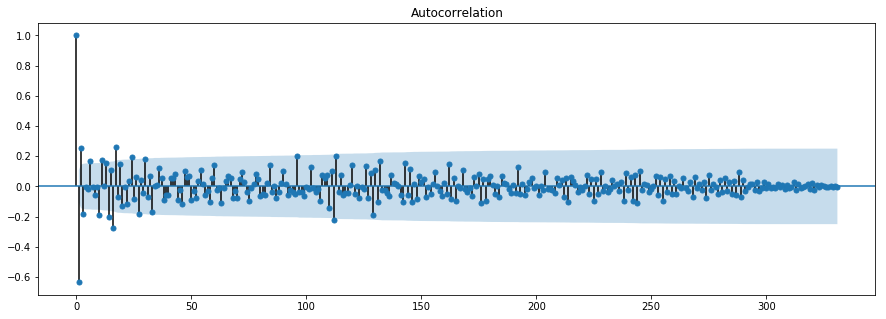

In [147]:
with mpl.rc_context():
    mpl.rc("figure", figsize=(15,5))
    plot_acf(ts.diff().diff().diff().diff().dropna())

In [96]:
ts.diff().shape

(96,)

In [61]:
ts.shape

(336,)

In [25]:
train, test = dif_ts[0:len(dif_ts)-1], dif_ts[len(dif_ts)-1:]

print(dif_ts.shape)
print(train.shape)
print(test.shape)

(334,)
(333,)
(1,)


In [23]:
history = [x for x in train]
predictions = [0 for x in test]
t = 0

model = ARIMA(history, order=(12,0,1))
model_fit = model.fit()
output = model_fit.forecast()
yhat = output[0][0]
predictions[t] = yhat
history.append(yhat)

print('stderr=%f' % output[1][0])
print('predicted=%f, expected=%f' % (yhat, test[t]))

stderr=0.699876
predicted=0.667809, expected=0.270000


C:\Users\Lahiru Sampath\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Lahiru Sampath\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
model_fit.summary()

In [28]:
history = [x for x in train]
predictions = [0 for x in test]

for t in range(len(test)):
    model = ARIMA(history, order=(12,0,2))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0][0]
    predictions[t] = yhat
    history.append(yhat)
    print('stderr=%f' % output[1][0])
    print('predicted=%f, expected=%f' % (yhat, test[t]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

stderr=0.689792
predicted=0.482301, expected=0.270000
Test MSE: 0.045


C:\Users\Lahiru Sampath\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Lahiru Sampath\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [24]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

NameError: name 'test' is not defined

In [ ]:
history

In [ ]:
predictions

In [ ]:
type(history)